In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('noshow.csv')

### Introduction


The dataset “No-show appointments” was chosen for this project. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
The project will try to identify common factors for patients who do not show up for an appointment.
The set includes data for appointments scheduled in advance and on the same day. Assumption is, that no-show is significant only for appointments scheduled in advance.
Does age have an influence on patients not showing up for an appointment? Are certain age groups more likely to not show up?
Text messages are send out to patients before the appointment. Does receiving the text messages increase the show rate?
Is gender an influence?
Does the time between the schedule date and the appointment date influence the no-show rate? Are no-shows more or less likely for appointments scheduled in advanced for a certain timeframe?


### Data cleaning process
1. Check for duplicates
2. Checking for non null values and data types
3. Converting Scheduled Day and Appointment Day to date time
4. One entry has a negative age, dropping the data, leaving age '0' entries in the dataframe

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [45]:
sum(df.duplicated())

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [47]:
#Changing to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [49]:
#Checking for negative and 0 age
df[df['Age']<=0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No


In [50]:
#Removing negative age
df=df[df['Age']>= 0]

### Furter changes to data

1.) In order to use functions on the No Show column, creating a new column 'no_show_int' replace yes and no with numerical values 1=yes and 0=no

'1' will mean the patient is no show

'0' will mean the patient is show

In [51]:
df['no_Show_int'] = df['No-show'].replace(to_replace='Yes', value=1)

In [52]:
df['no_Show_int']=df['no_Show_int'].replace(to_replace='No', value=0)

###  Further changes continued
2.) Normalize ScheduledDay and AppointmentDay to remove hours to compare<br>
3.) Get delta of the two days, to compare the distance between appointments

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
no_Show_int       110526 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 13.5+ MB


In [54]:
df['AppointmentDayNorm'] = pd.DatetimeIndex(df['AppointmentDay']).normalize()
df['ScheduledDayNorm'] = pd.DatetimeIndex(df['ScheduledDay']).normalize()

In [55]:
#Getting the delta
df['time_delta_norm'] = df['AppointmentDayNorm'] - df['ScheduledDayNorm'] 

### Question 1: Is no show only an issue for appointments scheduled in advance?

	
It can be assumned, that for appointments scheduled the same day, no-show does hardly occur.
In that case,<br> appointments that were scheduled in advance should be examined separately.
Convert timedelta to an integer<br> and get two different dataframes for same day and 
scheduled in advance

In [56]:
#timedelta to int
df['time_delta_norm_int'] = df['time_delta_norm'].values.astype(np.int64)    

In [57]:
#Scheduled in advance
df_different = df[df['time_delta_norm_int'] > 0]

In [58]:
#Same day appointments
df_same = df[df['time_delta_norm_int'] == 0]

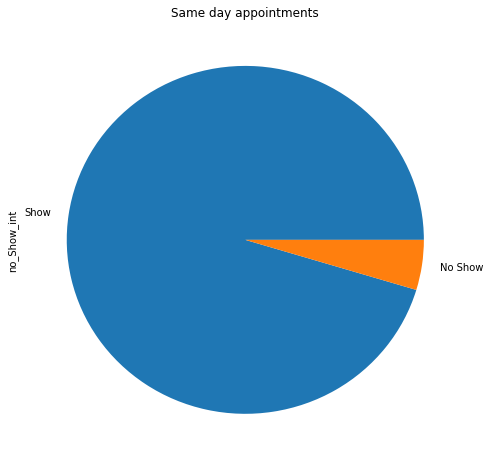

In [59]:
#Pie Chart for Appointments on the same day
% matplotlib inline
labels = 'Show', 'No Show'
plt.title("Same day appointments")
df_same['no_Show_int'].value_counts().plot(kind='pie', figsize =(8, 8), labels=labels)

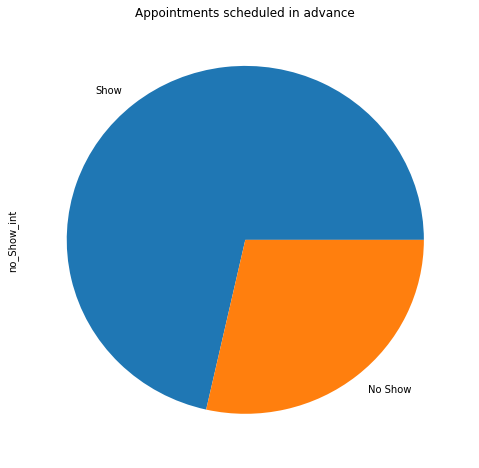

In [60]:
labels = 'Show', 'No Show'
plt.title("Appointments scheduled in advance")
df_different['no_Show_int'].value_counts().plot(kind ='pie', figsize =(8, 8),labels=labels)

## Conclusion for question 1
No show appointments are a problem mostly for appointments scheduled in advance. Going forward the analysis will concentrate on appointments <br> scheduled in advance. This additionally cleans the data from cases where appointment date is earlier then scheduled date.

## Question 2: Does age affect show vs. no show?
Looking up the oldest age and median to understand on which age groups to concentrate<br>
Creating age bracket for under 40


In [61]:
#Getting the oldest age
df_different.loc[df['Age'].idxmax()]

PatientId                      3.19632e+13
AppointmentID                      5700278
Gender                                   F
ScheduledDay           2016-05-16 09:17:44
AppointmentDay         2016-05-19 00:00:00
Age                                    115
Neighbourhood                   ANDORINHAS
Scholarship                              0
Hipertension                             0
Diabetes                                 0
Alcoholism                               0
Handcap                                  1
SMS_received                             0
No-show                                Yes
no_Show_int                              1
AppointmentDayNorm     2016-05-19 00:00:00
ScheduledDayNorm       2016-05-16 00:00:00
time_delta_norm            3 days 00:00:00
time_delta_norm_int        259200000000000
Name: 63912, dtype: object

In [62]:
#Getting median
df_different['Age'].median()

39.0

In [63]:
#40 and under age 
df_under40 = df_different[df_different['Age'] < 41]

Age: 40 is chosen as 39 is the median age. 
Separating in brackets of 5 for visualization.
The data so far suggest that age influences the no show rate, looking for a visualization for the age group under 40. Under 40 was selected to concentrate on most common age groups.

In [64]:
#Adding age brackets
df_under40['age_bracket'] = pd.cut(df_under40['Age'],8, labels=['1-5','5-10','10-15','15-20', '20-25', '25-30','30-35','35-40'])



/Users/utestohner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Creating a bar chart for ages under 40, grouped in 5<br>


In [65]:
#Getting values for bars
show_counts = df_under40[df_under40['no_Show_int'] == 0].groupby('age_bracket').count()['no_Show_int']
noshow_counts=df_under40[df_under40['no_Show_int'] == 1].groupby('age_bracket').count()['no_Show_int']
age_totals = df_under40.groupby('age_bracket').count()['no_Show_int']


In [66]:
#Proportions
nowshow_proportions = noshow_counts / age_totals
show_proportions = show_counts /age_totals

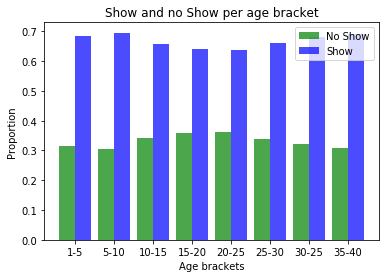

In [67]:
#Bar Chart
ind = np.arange(len(nowshow_proportions))  
width = 0.40 
# plot bars
noshow_bars = plt.bar(ind, nowshow_proportions, width, color='g', alpha=.7, label='No Show')
show_bar = plt.bar(ind + width, show_proportions, width, color='b', alpha=.7, label='Show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Age brackets')
plt.title('Show and no Show per age bracket')
locations = ind + width / 2  # xtick locations
labels = ['1-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-25', '35-40']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

In [68]:
#Printing out data to compare
df_under40.groupby('age_bracket')['no_Show_int'].value_counts(normalize=True).sort_index()

age_bracket  no_Show_int
1-5          0              0.685185
             1              0.314815
5-10         0              0.695652
             1              0.304348
10-15        0              0.657070
             1              0.342930
15-20        0              0.640642
             1              0.359358
20-25        0              0.637306
             1              0.362694
25-30        0              0.660668
             1              0.339332
30-35        0              0.679597
             1              0.320403
35-40        0              0.690129
             1              0.309871
Name: no_Show_int, dtype: float64

### Question 3: Does receiving a SMS increase show rate?

It could be assumned that receiving a reminder influences the no-show rate.
Grouping the patiens by SMS received and no show to visualize

Text(0,0.5,'Percentage')

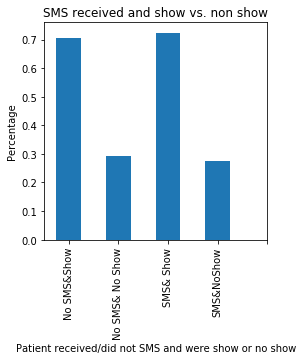

In [69]:
x=[0,1,2,3,4]
labels = ['No SMS&Show', 'No SMS& No Show', 'SMS& Show', 'SMS&NoShow']
df_different.groupby ('SMS_received')['no_Show_int'].value_counts(normalize=True).plot(kind='bar', figsize =(4, 4));
plt.xticks (x, labels, rotation='vertical')
plt.title ("SMS received and show vs. non show")
plt.xlabel('Patient received/did not SMS and were show or no show')
plt.ylabel('Percentage')

Showing raw data to go along with the bar chart

In [70]:
df_different.groupby ('SMS_received')['no_Show_int'].value_counts(normalize='True')

SMS_received  no_Show_int
0             0              0.705623
              1              0.294377
1             0              0.724255
              1              0.275745
Name: no_Show_int, dtype: float64

### Question 4: Does gender influence show vs. no show

Splitting the patients in four groups, by gender and show vs. no show.

In [71]:
df_different.groupby('Gender')['no_Show_int'].value_counts(normalize='True')

Gender  no_Show_int
F       0              0.715540
        1              0.284460
M       0              0.713341
        1              0.286659
Name: no_Show_int, dtype: float64

Text(0.5,0,'Gender and show/no show')

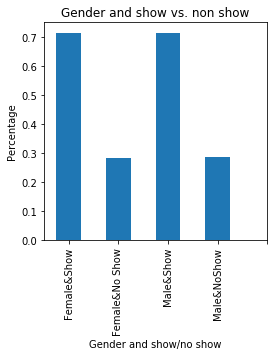

In [72]:
x=[0,1,2,3,4]
labels = ['Female&Show', 'Female&No Show', 'Male&Show', 'Male&NoShow']
df_different.groupby ('Gender')['no_Show_int'].value_counts(normalize=True).plot(kind='bar', figsize =(4, 4));
plt.xticks (x, labels, rotation='vertical')
plt.title ("Gender and show vs. non show")
plt.ylabel('Percentage')
plt.xlabel('Gender and show/no show')

In [73]:
df_different.groupby ('Gender')['no_Show_int'].value_counts(normalize=True)

Gender  no_Show_int
F       0              0.715540
        1              0.284460
M       0              0.713341
        1              0.286659
Name: no_Show_int, dtype: float64

### Question 5: Does the time between scheduling and actual appointment influence show vs no show?

Getting the max time delta between two appointments.

In [74]:
df_different.loc[df_different['time_delta_norm'].idxmax()]

PatientId                      4.54287e+11
AppointmentID                      5134227
Gender                                   M
ScheduledDay           2015-12-07 10:43:34
AppointmentDay         2016-06-03 00:00:00
Age                                     67
Neighbourhood                      MARUÍPE
Scholarship                              0
Hipertension                             1
Diabetes                                 1
Alcoholism                               0
Handcap                                  0
SMS_received                             0
No-show                                 No
no_Show_int                              0
AppointmentDayNorm     2016-06-03 00:00:00
ScheduledDayNorm       2015-12-07 00:00:00
time_delta_norm          179 days 00:00:00
time_delta_norm_int      15465600000000000
Name: 102786, dtype: object

To be able to focus on a shorter timeframe, getting  mean for  overall patient group and show and no show patients

In [75]:
#Getting the mean as 179 looks like an outlier
df_different['time_delta_norm'].mean()

Timedelta('15 days 15:24:30.387303')

In [76]:
df_different['time_delta_norm'].median()

Timedelta('9 days 00:00:00')

In [77]:
#Mean for  show
df_different[df_different['no_Show_int']==0]['time_delta_norm'].mean()

Timedelta('15 days 00:18:55.493905')

In [78]:
#Mean for no Show
df_different[df_different['no_Show_int']==1]['time_delta_norm'].mean()

Timedelta('17 days 05:14:17.109443')

Selecting data for 30 days time delta for visualization.

In [79]:
#Getting data for 31 days to not shorten the timeframe to more common time delta
df_different[df_different['time_delta_norm']< '31 days'].groupby ('time_delta_norm')['no_Show_int'].value_counts(normalize=True)


time_delta_norm  no_Show_int
1 days           0              0.786495
                 1              0.213505
2 days           0              0.761784
                 1              0.238216
3 days           0              0.764706
                 1              0.235294
4 days           0              0.767297
                 1              0.232703
5 days           0              0.733903
                 1              0.266097
6 days           0              0.752044
                 1              0.247956
7 days           0              0.733184
                 1              0.266816
8 days           0              0.712693
                 1              0.287307
9 days           0              0.725857
                 1              0.274143
10 days          0              0.683681
                 1              0.316319
11 days          0              0.683891
                 1              0.316109
12 days          0              0.683408
                 1          

In [80]:
#Creating dataframe out of groupby
df_short=df_different[df_different['time_delta_norm']<'31 days']


Creating a line chart for no show percentages within the first 30 days to illustrate the effect of time between scheduling and actual appointment

In [81]:
#Getting values for bars
show_counts_perday = df_short[df_short['no_Show_int'] == 0].groupby('time_delta_norm').count()['no_Show_int']
no_show_counts_perday= df_short[df_short['no_Show_int'] == 1].groupby('time_delta_norm').count()['no_Show_int']
show_totals_perday = df_short.groupby('time_delta_norm').count()['no_Show_int']
no_show_diff_proportion = no_show_counts_perday/show_totals_perday

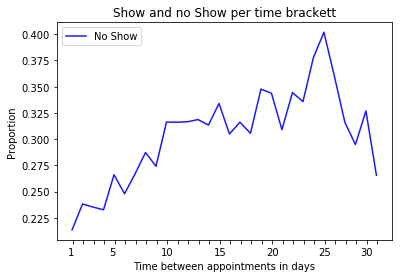

In [82]:
#Line Chart
ind = np.arange(len(no_show_diff_proportion))  
no_show_line = plt.plot(ind, no_show_diff_proportion, color='b', alpha=.9, label='No Show')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Time between appointments in days')
plt.title('Show and no Show per time brackett')
locations = ind + width / 5 #/ 3  # xtick locations
labels = ['1 ', '','','', '5 ','', '', '', '' ,'10','', '', '' ,'','15', '', '','','' ,'20',
            '','','','','25','','','','' '30']  # xtick labels
plt.xticks(locations, labels)
       
# legend
plt.legend()

### Conclusions snd Limitations
* For same day appointments, no show is not significant
* Age:  Age groups from 15-20 have slighlty higher no show rate then older and younger age groups. The set does not contain information about type of appointment.  The age alone is probably not causing patients to not show up to their appointments, it might be factors that are most common for certain age groups that we can not get out of the data set,
* SMS received:  No positive influence on the patient showing up. Assuming that 1 stands for SMS received, percentage of users who received an SMS and did not show up was even slightly higher than of users who received an SMS and did show up for the appointment. This could be caused as "received" might be misnmaned, possible that this is tracking "SMS send"
* Gender: Not a significant influence
* Delta between day when appointment was scheduled and actual appointment: Significant influence: No show rate increases by 10 percentage points between 1 day and 29 days of time delta.